<a href="https://colab.research.google.com/github/ja20835/team25.Titanic/blob/main/Team25_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Data Analysis
import pandas as pd
import numpy as np

In [3]:
#Visualisation of Data
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Machine-Learning
import sklearn

In [5]:
#github link for data
! git clone https://github.com/ja20835/team25.Titanic.git

Cloning into 'team25.Titanic'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [6]:
#Read data
train = pd.read_csv('team25.Titanic/train.csv')
test = pd.read_csv('team25.Titanic/test.csv')
gender = pd.read_csv('team25.Titanic/gender_submission.csv')

In [7]:
#Display data-sample
print(train.head())
print("\n")
print(test.head())
print("\n")
print(gender.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [8]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


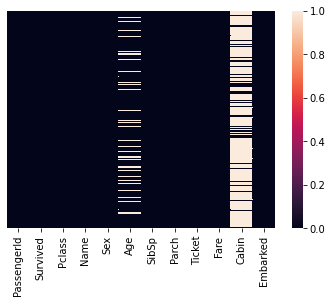

In [12]:
sns.heatmap(train.isnull(), yticklabels = False)
# Using heatmap, check missing data values within train.csv

In [22]:
def missing_percent(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percentage = round(total * 100 / len(df), 2)
  return pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage'])

In [23]:
missing_percent(train)
# This shows that 77% of the cabin collumn is empty, therefor we will ignore/remove this collumn
# 20% of age is missing, we will estimate the average ages for males and females from the existing data and insert those values instead of leaving empty
# There are 2 missing values from embarked. Depending on the other data from those people, we may remove them from the dataset

,Total,Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


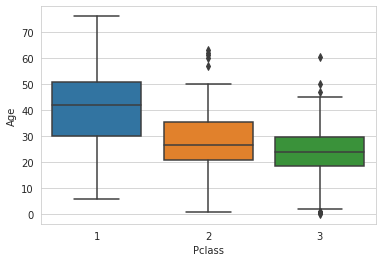

In [25]:
sns.set_style("whitegrid")
sns.boxplot(x = 'Pclass', y = 'Age', data=test)
# Show mean age by class

In [33]:
def impute_age_test(cols1):
  Age = cols1 [0]
  Pclass = cols1 [1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 42
    elif Pclass == 2:
        return 27
    else:
          return 25
  else:
        return Age
# Return average age for each class. class1=42. class2=27. otherclass=25

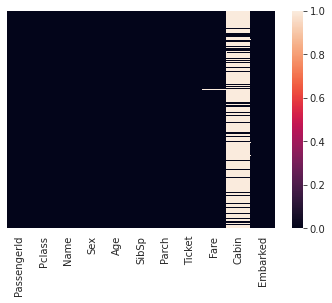

In [34]:
test['Age'] = test [['Age', 'Pclass']].apply(impute_age_test, axis = 1)
sns.heatmap(test.isnull(), yticklabels = False)
# Create heatmap to exlude Age values test

In [37]:
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)
# Remove cabin collumn/values from train and test data.

KeyError: ignored

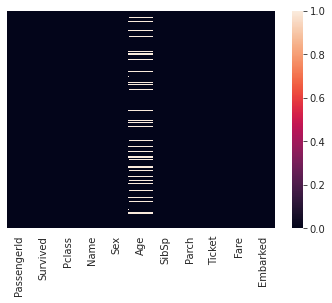

In [38]:
sns.heatmap(train.isnull(), yticklabels = False)
# New heatmap to show data without cabin values

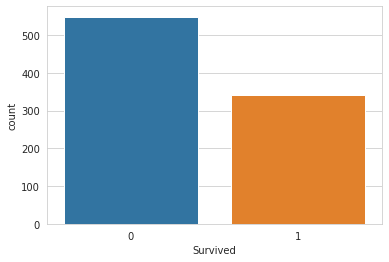

In [40]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train)
# This shows a count of those who did, and did not survive
# We see around 550 did not survive
# Around 340 did survive

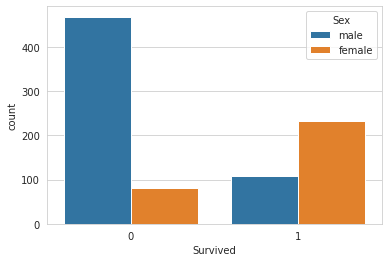

In [41]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train)
# Count of survival rate between male and female
# Around 470 males did not survive, around 110 did survive
# Around 80 females did not survive, around 230 did survive

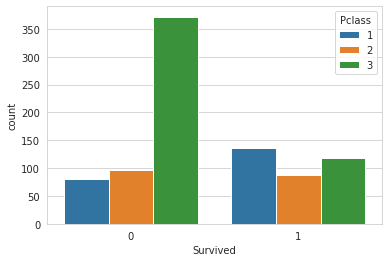

In [42]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)
# Show survival rate between Class
# Class3 deaths were much higher than other classes
# This is a clear correlation between class and survival rate

In [43]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)
# Show % of survival per class

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [44]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)
# Show % of survival based on sex

,Sex,Survived
0,female,0.742038
1,male,0.188908


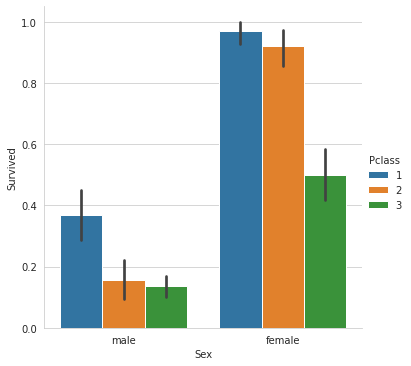

In [47]:
sns.catplot(x = 'Sex', y = 'Survived', hue = 'Pclass', kind = 'bar', data = train)
# Show survival rate for males and females split by Class
# Class1 had the highest survival rate
# Females were far more likely than male to survive, regardless of class
# (class 3 females had a higher suvival rate than class 1 males)

In [48]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)
# Show survival rate dependant on siblings or spouse
# those with a higher count were less likely to survive
# so far, being a Class1 Female, with 1 Sibling or Spouse gives you the highest chance to survive

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [49]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)
# Show survival rate dependant on count of Parents or Children
# So far it seems that a class1 female mother or child has the highest chance to survive

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


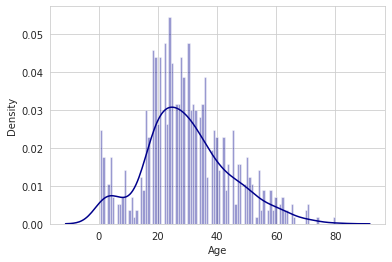

In [51]:
sns.distplot(train['Age'], kde = True, bins = 100, color = 'darkblue')

In [17]:
#with open('team25.Titanic/train.csv', 'r') as f:
  #print(f.read())